In [1]:
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')

1. Introduction
2. Data Description:
    1. Twitter Data
        1. Columns we will be using
        2. Limitations of the data
    2. Covid Global data
        1. Columns we will be using
        2. Limitations of the data
    3. Ethical Consideration
3. Data Preperation, Cleaning and Manipulation:
4. Exploratory Data Analysis (EDA):
    1. Tweeter User Demographics
        1. New User Resigistraion Date (pre-covid user vs post covid user)
        2. Tweet by country and unique user in that country
    2. Sentiment
        1. overal sentiment, pos-neu-neg-compound
        2. Dig in
            1. sentiment over time in the US, consider vaccine valiable date and mandate date, also home test kit avaliable time
                1. by city
                2. by political mapping
            2. sentiment exclue the US, what are the diffference?
6. Correlation Analysis:
    1. mention home test self-report

## 1. Introduction

As the pandemic has impacted the globe for 3 years and continued to reach repetitive peaks in different regions, epidemics and corresponding preventive measures have become the center of discussion and concerns to modern society. While previously it was much difficult to collect adequate reactions to vaccines across different communities at one place, twitter allows us to access expressed sentiments from a variety of communities.


With that comes various opinions about the vaccine, and many choose to be vocal about their ideas on social media. We wondered whether looking at social media would help us understand what different communities across the world thought of the Vaccine, and whether such opinions are teetered by their socio-political climates and geographical locations.

To do this, we turned to Twitter and scraped tweets containing hastags related to the vaccine. We then took these datapoints and quantified their approval ratings by calcuatinng sentiment score for each text. We then expressed this information in the form of graphs and maps. Currently, we have 5000 datapoints, and over 2000 datapoints with geographical coordinates.

We hope that by reviewing these charts and maps, we can better understand the concerns different communitites have over the vaccine, and what may be contributing factors to this.

The proposed project is to analyze tweets about the Pfizer-BioNTech vaccine in order to understand how sentiment varies by country, over time, and by demographic factors. The project also aims to study the correlation between sentiment and the number of confirmed cases, deaths, and active cases, and to compare the sentiment of tweets about the Pfizer-BioNTech vaccine to the sentiment of tweets about other COVID-19 vaccines. The goal is to gain insights on how people perceive and discuss the Pfizer-BioNTech vaccine on social media in different countries, how it changes over time and how it is influenced by various demographic factors. This information can be useful for researchers, healthcare professionals, and policymakers, to understand public opinion and to develop strategies to improve vaccine uptake.

## 2. Data Description

### 2.1 Twitter Data

Our primary dataset is The Pfizer and BioNTech Vaccine Tweets Dataset posted on Kaggle and created by Gabriel Preda, who is a data scientist in Romania. 

Key features: Select 'user_location' 'text', 'hashtags' to extract useful information we want: locations for geo analysis, and their original tweets about the vaccines for text processing and sentiment analysis
Estimated size: 4.54 MB
Location: https://www.kaggle.com/gpreda/pfizer-vaccine-tweets
Format: CSV file
Access Method: through download or Kaggle API
COLLECTION METHODOLOGY:
Use tweepy to collect tweets about Pfizer & BioNTech (using #PfizerBioNTech hashtag)

### 2.2 COVID-19 Global

Our secondary dataset is the Covid-19 Global Dataset. The creator of the data set is an artificial intelligence engineer from Lebanon. 

Key features: useful columns to include are ‘total_confirmed’, ‘total_deaths’, ‘active_cases’, ‘, country’ to reflect the up-to-date numbers of daily confirmed, death and active cases for 218 countries
Estimated size:20.38 kB (but with multiple versions)
Location: https://www.kaggle.com/josephassaker/covid19-global-dataset?select=worldometer_coronavirus_summary_data.csv
Format: CSV file
Access Method: through download or Kaggle API


### 2.3 Ethical Concerns and bias

User privacy protection,
removed unique identifiers.

Limitations of the data

## 3. Data Preperation, Cleaning and Manipulation

In [2]:
# load the datasets:
tweet_df = pd.read_csv("data/vaccination_tweets.csv")
covid_df = pd.read_csv("data/worldometer_coronavirus_daily_data.csv")

In [3]:
tweet_df.sample(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
5466,1359491511558275077,Jane Brown,"Toronto, ON","@RTDNA award winning news anchor, @zoomerradio...",2013-02-28 16:39:40,2842,1619,7136,False,2021-02-10 13:16:49,Canada is competing for special syringes to wi...,NaN,Twitter Web App,4,8,False
7430,1377378900246888448,Diplomacy140,"London, England","Reshaping the World: Ethics, Global Governance...",2014-02-22 10:09:33,3838,1791,618,False,2021-03-31 21:54:54,#PfizerBioNTech lifts this year #vaccine produ...,"['PfizerBioNTech', 'vaccine', 'AstraZeneca']",Twitter for iPhone,0,0,False
1550,1341081926384427008,Adrie Streefland,Amsterdam,DECADE-DESASTREUS 2017-2027. Wegens de terugke...,2012-03-05 10:51:39,101,181,317,False,2020-12-21 18:03:42,The presentation of #EMA approval today for #P...,"['EMA', 'Pfizer', 'CoronaVaccine', 'Cancer']",Twitter Web App,0,0,False
4777,1354413146933489666,Tahoma Lewis,"Washington, DC",French teacher. Real life teacher to students....,2011-07-07 13:55:39,151,148,1475,False,2021-01-27 12:57:12,When the #CDC makes this page inaccessible on ...,['CDC'],Twitter for Android,0,1,False
1858,1344239619227987968,Louis Gerber,NaN,editor-in-chief https://t.co/Zb8BlZTcFz writin...,2019-03-18 14:10:58,91,914,238,False,2020-12-30 11:11:14,Oxford + #AstraZeneca #vaccine approved by #UK...,"['AstraZeneca', 'vaccine', 'UK', 'oxfordvaccin...",Twitter Web App,0,1,False


In [4]:
# check for shape and missing values of the tweeter dataset
print(tweet_df.shape)
print(tweet_df.isna().sum())

(11020, 16)
id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64


In [5]:
covid_df.sample(5)

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
49115,2022-1-26,Dominica,8838.0,111.0,729.0,51.0,0.0
20305,2021-11-01,Bosnia And Herzegovina,254348.0,302.0,NaN,11607.0,41.0
119946,2020-9-04,New Zealand,1764.0,5.0,106.0,28.0,1.0
24769,2020-8-02,Burkina Faso,1143.0,0.0,145.0,53.0,0.0
81740,2021-8-04,Isle Of Man,5145.0,123.0,1095.0,31.0,1.0


In [6]:
# check for shape and missing values of the covid-19 stats dataset
print(covid_df.shape)
print(covid_df.isna().sum())

(184787, 7)
date                           0
country                        0
cumulative_total_cases         0
daily_new_cases            10458
active_cases               18040
cumulative_total_deaths     6560
daily_new_deaths           26937
dtype: int64


In [7]:
# subseting the tweeter data
tweet_df = tweet_df[[ 'user_name','user_location', 'user_created', 'date', 'text', 'hashtags', 'retweets', 'favorites']]
# encode user_name using to integers according to ethical concerns 7202 unique usernames detected
tweet_df['user_name'] = tweet_df['user_name'].factorize()[0]
# change the format
tweet_df['date'] = pd.to_datetime(tweet_df['date'], errors = 'coerce').dt.date
tweet_df['user_created'] = pd.to_datetime(tweet_df['user_created'], errors = 'coerce').dt.date

In [8]:
covid_df['date'] = pd.to_datetime(covid_df['date'], errors = 'coerce').dt.date

### 3.1 Adding Counrty and City for joining.

In [9]:
# first, we try to get the city if possible
#!pip install geotext
from geotext import GeoText
# we will need the another tool to interact with Geotext
from collections import OrderedDict
def get_city(loc_txt):
    try:
        return GeoText(loc_txt).cities[0]
    except:
        pass
    return None

def get_counrty(loc_txt):
    try:
        return list(GeoText(loc_txt).country_mentions.keys())[0]
    except:
        pass
    
    return None
        
tweet_df['city'] = tweet_df['user_location'].apply(get_city)
tweet_df['country'] = tweet_df['user_location'].apply(get_counrty)

In [10]:
tweet_df.sample(5)

,user_name,user_location,user_created,date,text,hashtags,retweets,favorites,city,country
2762,1871,"West Sussex, UK",2020-12-15,2021-01-07,A good illustration on how the #PfizerBioNTech...,"['PfizerBioNTech', 'coronavirus']",0,0,None,None
5138,571,"South East, England",2010-10-06,2021-02-04,@VicVA2 I had my first vaccine injection on Mo...,NaN,0,2,None,None
2040,1402,NaN,2018-03-11,2021-01-01,I wish everyone in the world would take this s...,NaN,4,15,None,None
10701,29,"Cranbury, NJ",2016-01-29,2021-10-06,#Qatar has one of the highest #vaccination rat...,"['Qatar', 'vaccination', 'Pfizervaccine']",0,0,None,None
7114,3916,España,2011-06-27,2021-03-20,#VaccineRulers \n\nTimeline of world leaders &...,"['VaccineRulers', 'Covid19', 'vaccine']",1,0,None,None


In [11]:
# second we get the country
# !pip install pycountry
import pycountry

def fill_country(loc_txt, country):
    if country!=None:
        return country
    candicates = []
    candicates = [country.name for country in pycountry.countries if country.name in str(loc_txt)]
    if candicates:
        return candicates[0]
    candicates = [country.alpha_2 for country in pycountry.countries if country.alpha_2 in str(loc_txt)]
    if candicates:
        return candicates[0]
    candicates = [country.alpha_3 for country in pycountry.countries if country.alpha_3 in str(loc_txt)]
    if candicates:
        return candicates[0]
    return None

tweet_df['country'] = tweet_df[['user_location','country']].apply(lambda x:fill_country(x['user_location'],x['country']),axis=1)

In [12]:
# %%time
# this may take about 5 mins
# !pip install country_converter
# convert country names to standard format
import country_converter as coco
tweet_df['country'] = tweet_df['country'].apply(lambda x: str(x))
tweet_df['country'] = coco.convert(names=tweet_df['country'].to_list(), to='name_short')
tweet_df['country'] = tweet_df['country'].apply(lambda x: None if x=="not found" else x)
# there is nothing we can do about the error 

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

In [13]:
tweet_df.sample(5)

,user_name,user_location,user_created,date,text,hashtags,retweets,favorites,city,country
9954,6589,Washington D.C,2020-10-07,2021-08-23,FDA grants full approval to Pfizer/BioNTech Co...,['FDAapproval'],0,0,Washington,United States
1236,439,Wiltshire & Shrewsbury too,2013-04-21,2020-12-23,@sorcererpds @BorisJohnson Very very few resid...,NaN,0,1,Shrewsbury,United States
91,74,"New York, NY",2011-06-10,2020-12-14,One of the first vaccines receivers in the US....,"['COVID19', 'CovidVaccine']",0,0,New York,United States
4872,903,"Carribean,selling ice cream",2017-02-02,2021-01-28,"@SkyNews Has Johnson became a vaccine expert, ...",NaN,1,1,None,None
4620,3104,"Canberra, Australia",2020-07-28,2021-01-26,Glad to be alongside Professors John Skerritt ...,NaN,14,52,Canberra,Australia


In [14]:
tweet_df.isna().sum()

user_name           0
user_location    2270
user_created        0
date                0
text                0
hashtags         2582
retweets            0
favorites           0
city             6701
country          4417
dtype: int64

### 3.2 Text Cleaning and sentiment evaluation
Besides the spacial relationship, we are also interested in the content that users posted. To measure users' approval of the COVID-19 vaccine, we will approach with the sentiment score of the texts.

The nltk library we will be using returns measures of postivity, negativity, neutrality, and a compound sentiment score of the text. The higher the compound sentiment score, the greater the approval.

We will need to import the NLTK library and download some dictionaries to run certain methods.

In [15]:
import re

# make all text lowercase
tweet_df['clean_text'] = tweet_df.text.apply(lambda x: x.lower())

#Remove twitter handlers
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub(r'\B#\S+','',x))

# Remove URLS
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# removing short words
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
import nltk
# downlaod some resouces
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# load the sentiment function
sia = SentimentIntensityAnalyzer()
# load the stemmer function 
porter = nltk.PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JYM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JYM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JYM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
# romve stop-wards
stop_words = stopwords.words('english')

# tokenization
tokenized_tweet = tweet_df['clean_text'].apply(lambda x: x.split())

# remove stop-words
tokenized_tweet = tokenized_tweet.apply(lambda x: [item for item in x if item not in stop_words])

# similar to stop words, we create a list of words we don't want
unwanted_words = ['covid','vaccine']
tokenized_tweet = tokenized_tweet.apply(lambda x: [w for w in x if w not in unwanted_words])
tokenized_tweet = tokenized_tweet.apply(lambda x: [w for w in x if not(w.find('http')!=-1)])
tokenized_tweet = tokenized_tweet.apply(lambda x: [w for w in x if not(w.find('vac')!=-1)])
tokenized_tweet = tokenized_tweet.apply(lambda x: [w for w in x if not(w.find('covid')!=-1)])

# de-tokenization
detokenized_tweet = []
for i in range(len(tweet_df)):
    t = ' '.join(tokenized_tweet[i])
    detokenized_tweet.append(t)
tweet_df['tweet_words'] = tokenized_tweet 
tweet_df['clean_text'] = detokenized_tweet

In [18]:
tweet_df[['text','tweet_words','clean_text']].sample(5)

,text,tweet_words,clean_text
8806,I'm vaccinated 💉\n#PfizerBiontech,[],
3780,Death of 23 people's in #Norway after receivin...,"[death, peoplein, receiving, pathetic, scarry,...",death peoplein receiving pathetic scarry autop...
9256,Just got my first dose of #PfizerBiontech vacc...,"[first, dose, today, yorobun, shots]",first dose today yorobun shots
8726,".@AGCBiologics, a #biopharma CDMO based in #He...","[cdmo, based, agreed, supply]",cdmo based agreed supply
10635,All done.. ✨\n #FullyVaccinated #Pfizerbiontec...,[done],done


In [19]:
# Now we will calculate the sentiment score for each tweet.

tweet_df['compound_sentiment'] = tweet_df['clean_text'].apply(lambda x:sia.polarity_scores(x)['compound'])
tweet_df['neg_sentiment'] = tweet_df['clean_text'].apply(lambda x:sia.polarity_scores(x)['neg'])
tweet_df['pos_sentiment'] = tweet_df['clean_text'].apply(lambda x:sia.polarity_scores(x)['pos'])
tweet_df['neu_sentiment'] = tweet_df['clean_text'].apply(lambda x:sia.polarity_scores(x)['neu'])

In [20]:
tweet_df.sample(5)

,user_name,user_location,user_created,date,text,hashtags,retweets,favorites,city,country,clean_text,tweet_words,compound_sentiment,neg_sentiment,pos_sentiment,neu_sentiment
7083,4692,"San Rafael, Argentina",2018-07-30,2021-03-19,"@CoraDvorkin Thanks for your information, Arge...",['PfizerBiontech'],0,1,San Rafael,Argentina,thanks information argentina know hegemonic me...,"[thanks, information, argentina, know, hegemon...",0.6597,0.000,0.519,0.481
1224,858,Noblesville & Bentonville,2009-12-28,2020-12-24,Take 10% off these red animal print dress 👗\n\...,NaN,0,1,Noblesville,United States,take animal print dress dress haswaistband exp...,"[take, animal, print, dress, dress, haswaistba...",-0.2023,0.208,0.132,0.660
6064,3975,Currently in 🇸🇬,2009-06-08,2021-02-23,2nd dose/last dose of vaccine tomorrow 💪\n#Pfi...,"['PfizerBioNTech', 'COVID19Vaccination']",0,1,None,None,dose last dose tomorrow,"[dose, last, dose, tomorrow]",0.0000,0.000,0.000,1.000
5037,3384,NaN,2021-02-01,2021-02-02,Got my second dose of Pfizer-BioNTech Covid-19...,"['VaccinesSaveLives', 'COVID19Vaccine', 'vacci...",0,1,None,None,second dose pfizer biontech,"[second, dose, pfizer, biontech]",0.0000,0.000,0.000,1.000
2171,1483,USA,2019-06-28,2021-01-03,Similar safety profile as other viral vaccines...,"['PfizerBioNTech', 'Pfizer', 'COVID19']",0,0,None,Saudi Arabia,similar safety profile viral,"[similar, safety, profile, viral]",0.4215,0.000,0.483,0.517


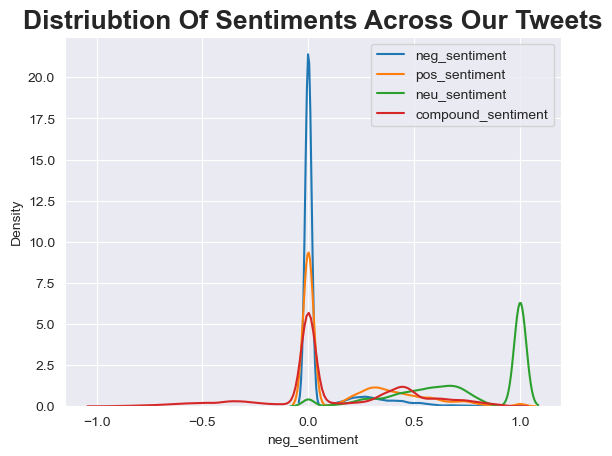

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.title('Distriubtion Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(tweet_df['neg_sentiment'],bw=0.1, label = 'neg_sentiment')
sns.kdeplot(tweet_df['pos_sentiment'],bw=0.1, label = 'pos_sentiment')
sns.kdeplot(tweet_df['neu_sentiment'],bw=0.1, label = 'neu_sentiment')
sns.kdeplot(tweet_df['compound_sentiment'],bw=0.1, label = 'compound_sentiment')
plt.legend(loc='upper right')
plt.show()

In [22]:
merged_df = tweet_df.merge(covid_df, on=['country', 'date'], how='left')
merged_df['date'] = pd.to_datetime(merged_df['date'], errors = 'coerce')
merged_df['user_created'] = pd.to_datetime(merged_df['user_created'], errors = 'coerce')
display(merged_df.sample(5))
merged_df.isna().sum()

,user_name,user_location,user_created,date,text,hashtags,retweets,favorites,city,country,...,tweet_words,compound_sentiment,neg_sentiment,pos_sentiment,neu_sentiment,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
6634,4381,"Dubai, United Arab Emirates",2009-11-05,2021-03-09,Got my first jab of #PfizerBiontech #COVID19 v...,"['PfizerBiontech', 'COVID19']",0,4,Dubai,United Arab Emirates,...,"[first, today, wonderful, arrangements, prompt...",0.5719,0.0,0.425,0.575,415705.0,2373.0,17927.0,1345.0,10.0
3590,2458,"Clarington, Ontario",2009-03-10,2021-01-16,Vaccination Day #COVID19Ontario #PfizerBioNTec...,"['COVID19Ontario', 'PfizerBioNTech', 'CovidVac...",0,0,Ontario,United States,...,[],0.0000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN
4871,3279,"Lethbridge, Alberta",2016-01-18,2021-01-28,Shandro calls out Ottawa’s “failure” to secure...,"['YQL', 'LNN', 'COVID19', 'Alberta', 'Vaccine']",0,1,Lethbridge,Canada,...,"[shandro, calls, ottawafailure, secure, supply]",0.3400,0.0,0.375,0.625,766103.0,4876.0,57252.0,19432.0,129.0
10347,5119,South Florida,2009-07-29,2021-09-13,"Third doses, or #boosters, of #PfizerBioNTech ...","['boosters', 'PfizerBioNTech', 'Moderna', 'COV...",2,7,None,None,...,"[third, doses, available, local, pharmacies]",0.0000,0.0,0.000,1.000,NaN,NaN,NaN,NaN,NaN
9621,6376,NaN,2018-12-30,2021-08-09,2nd dose hits different 😴 \nGlad today's a Pub...,['PfizerBiontech'],0,0,None,None,...,"[dose, hits, different, glad, todaya, public, ...",0.6908,0.0,0.533,0.467,NaN,NaN,NaN,NaN,NaN


user_name                     0
user_location              2270
user_created                  0
date                          0
text                          0
hashtags                   2582
retweets                      0
favorites                     0
city                       6701
country                    4417
clean_text                    0
tweet_words                   0
compound_sentiment            0
neg_sentiment                 0
pos_sentiment                 0
neu_sentiment                 0
cumulative_total_cases     7147
daily_new_cases            7147
active_cases               7255
cumulative_total_deaths    7147
daily_new_deaths           7162
dtype: int64

## 4. Exploratory Data Analysis (EDA)


#### 4.1 User Demographics
Created Time
    Followers
    Frequency by City and Country
#### 4.2 Sentiment Score Over time
#### 4.3 Sentiment Score VS Location
#### 4.4 

In [23]:
df = merged_df.copy()
post_covid_df = merged_df[merged_df['user_created']>=pd.Timestamp(datetime.date(2020, 3, 1))].copy()
pre_covid_df = merged_df[merged_df['user_created']<pd.Timestamp(datetime.date(2020, 3, 1))].copy()

<Figure size 1600x800 with 0 Axes>

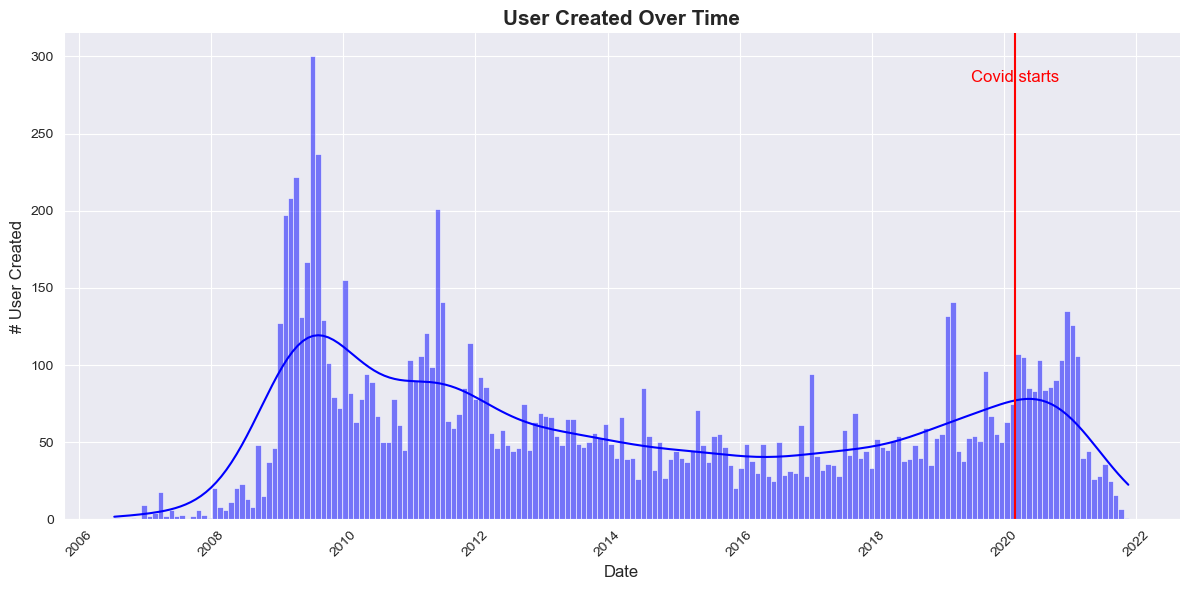

In [24]:
def plot_user_create_over_time(df):
    plt.figure(figsize=(16,8))
    sns.displot(df, x="user_created", kde=True, color='blue',height=6, aspect=2,binwidth=30)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('# User Created', fontsize=12)
    # plt.xlim([datetime.date(2019, 1, 1), datetime.date(2022, 1, 1)])
    plt.axvline(x=datetime.date(2020, 3, 1), color='red')
    plt.text(datetime.date(2020, 3, 1), plt.ylim()[1]*0.9, 'Covid starts', ha='center', color='red', fontsize=12) # Add the annotation
    plt.title('User Created Over Time', fontsize=15, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_user_create_over_time(df)

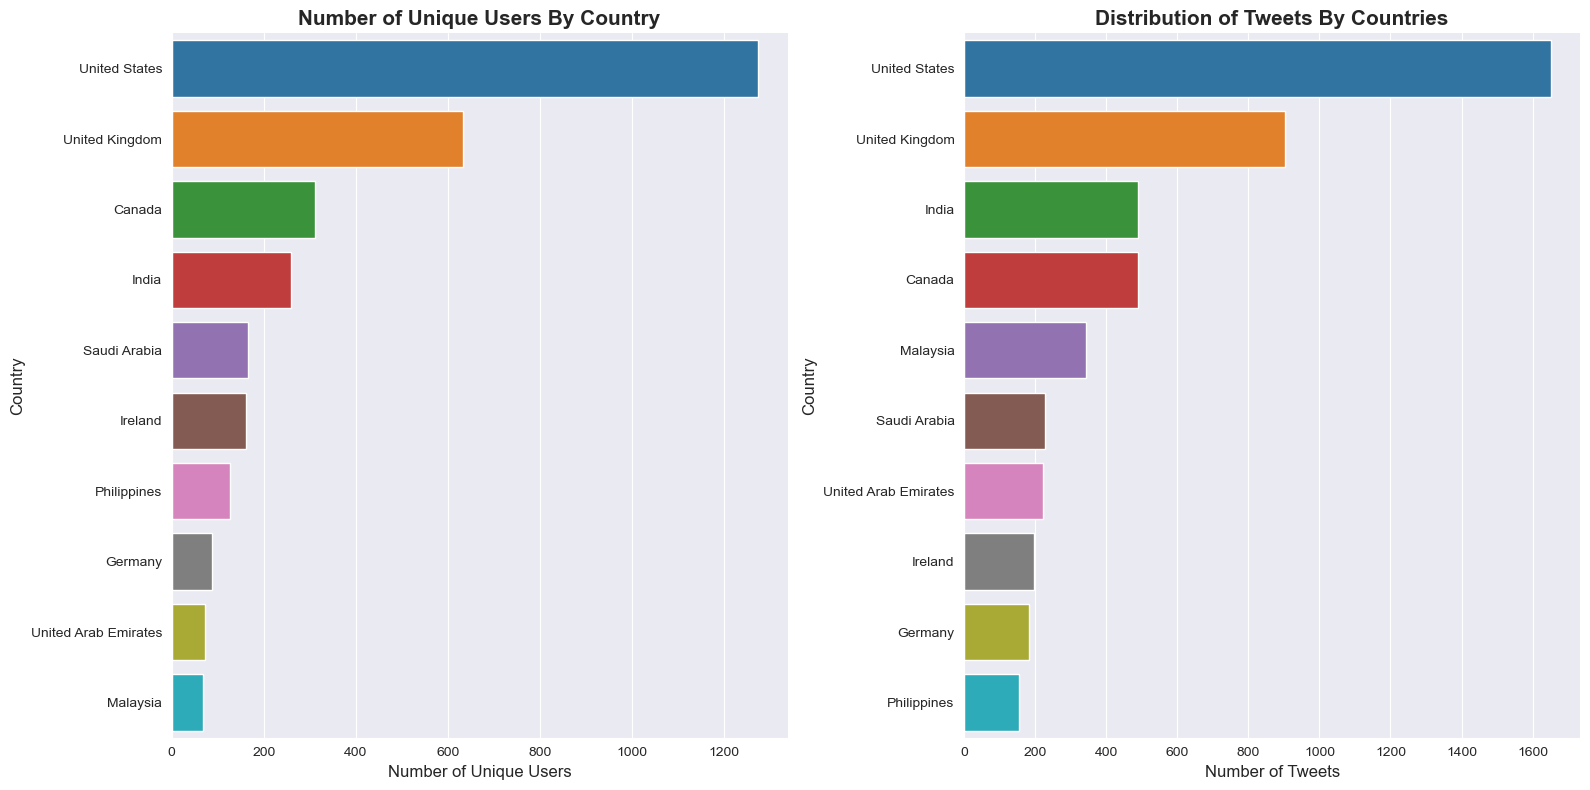

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first countplot in the first subplot
user_country = df[['user_name', 'country']].value_counts().reset_index()
top_10_countries =  user_country['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=user_country['country'], order=top_10_countries.index, orient='h', ax=axs[0])
axs[0].set_xlabel('Number of Unique Users', fontsize=12)
axs[0].set_ylabel('Country', fontsize=12)
axs[0].set_title("Number of Unique Users By Country", fontsize=15, fontweight='bold')

# Plot the second countplot in the second subplot
top_10_countries =  df['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=df['country'], order=top_10_countries.index, orient='h', ax=axs[1])
sns.despine() # Remove top and right spines
axs[1].set_xlabel('Number of Tweets', fontsize=12)
axs[1].set_ylabel('Country', fontsize=12)
axs[1].set_title('Distribution of Tweets By Countries', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()


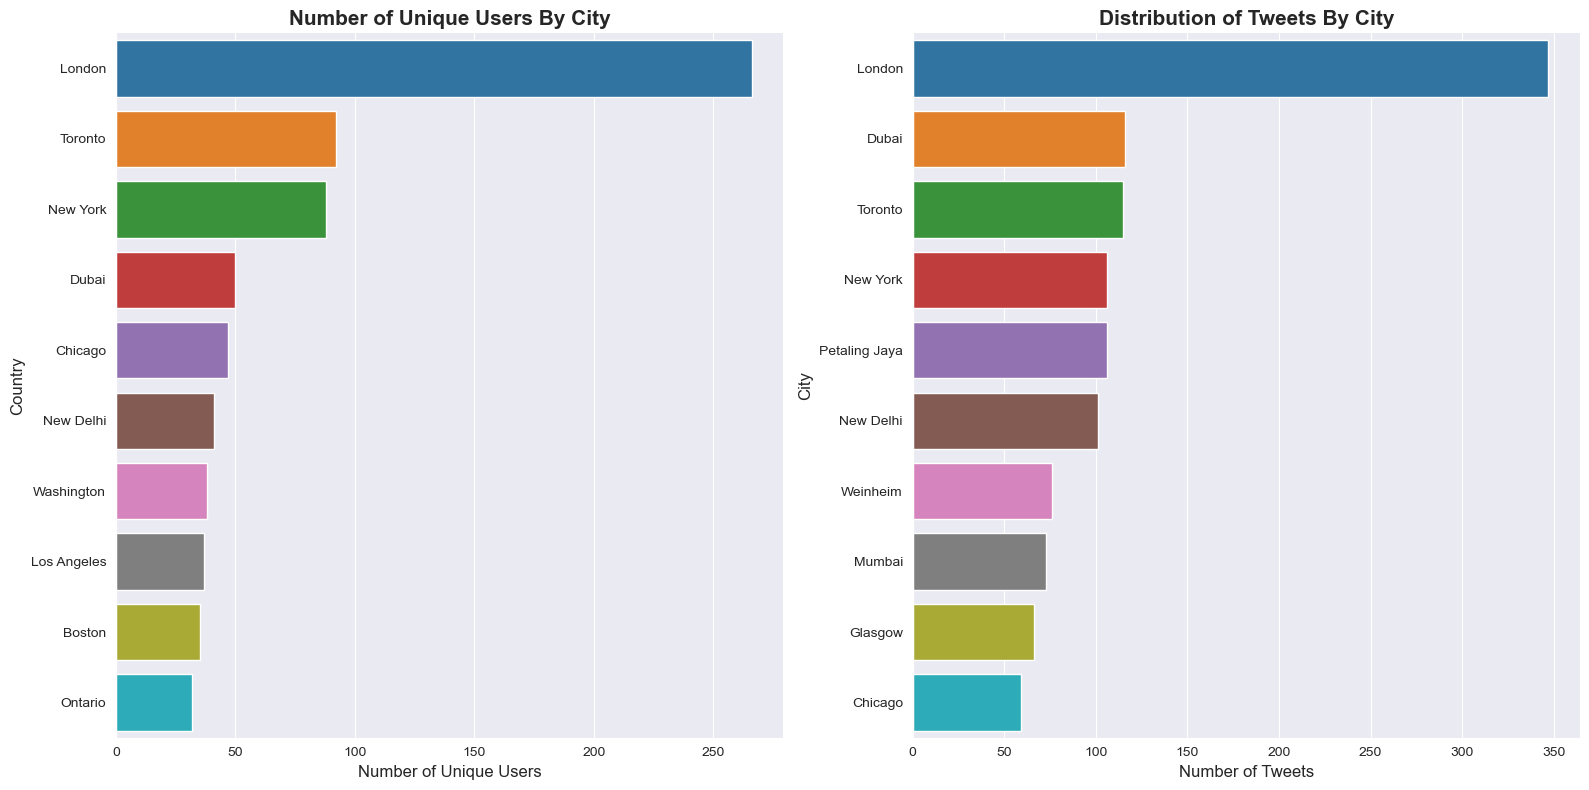

In [26]:
# Create a new figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first countplot in the first subplot
user_country = df[['user_name', 'city']].value_counts().reset_index()
top_10_countries =  user_country['city'].value_counts(sort=False).nlargest(10)
sns.countplot(y=user_country['city'], order=top_10_countries.index, orient='h', ax=axs[0])
axs[0].set_xlabel('Number of Unique Users', fontsize=12)
axs[0].set_ylabel('Country', fontsize=12)
axs[0].set_title("Number of Unique Users By City", fontsize=15, fontweight='bold')

# Plot the second countplot in the second subplot
top_10_countries =  df['city'].value_counts(sort=False).nlargest(10)
sns.countplot(y=df['city'], order=top_10_countries.index, orient='h', ax=axs[1])
sns.despine() # Remove top and right spines
axs[1].set_xlabel('Number of Tweets', fontsize=12)
axs[1].set_ylabel('City', fontsize=12)
axs[1].set_title('Distribution of Tweets By City', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

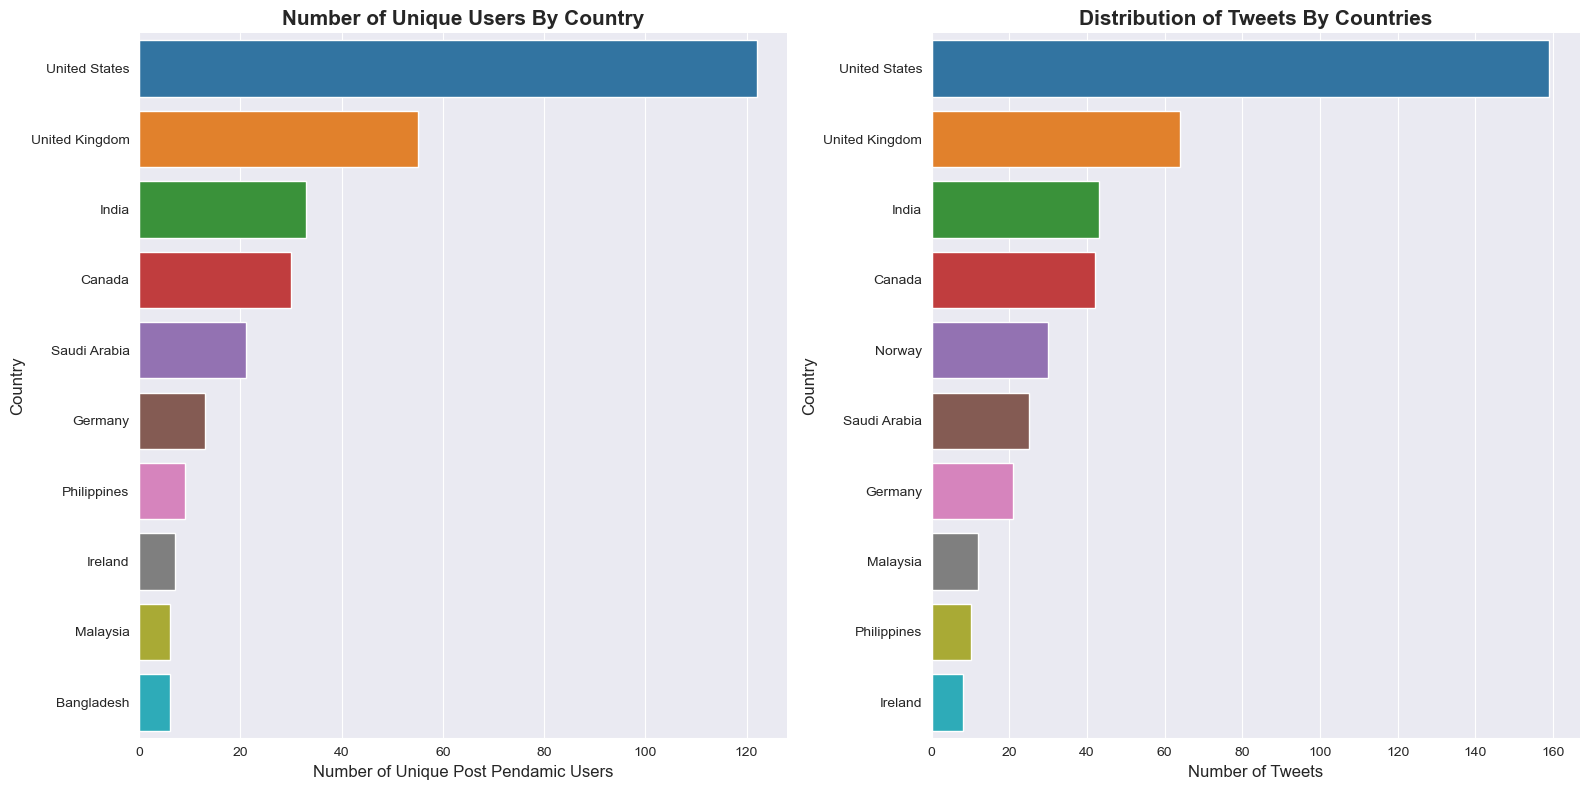

In [27]:
# Create a new figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first countplot in the first subplot
user_country = post_covid_df[['user_name', 'country']].value_counts().reset_index()
top_10_countries =  user_country['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=user_country['country'], order=top_10_countries.index, orient='h', ax=axs[0])
axs[0].set_xlabel('Number of Unique Post Pendamic Users', fontsize=12)
axs[0].set_ylabel('Country', fontsize=12)
axs[0].set_title("Number of Unique Users By Country", fontsize=15, fontweight='bold')

# Plot the second countplot in the second subplot
top_10_countries =  post_covid_df['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=post_covid_df['country'], order=top_10_countries.index, orient='h', ax=axs[1])
sns.despine() # Remove top and right spines
axs[1].set_xlabel('Number of Tweets', fontsize=12)
axs[1].set_ylabel('Country', fontsize=12)
axs[1].set_title('Distribution of Tweets By Countries', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()


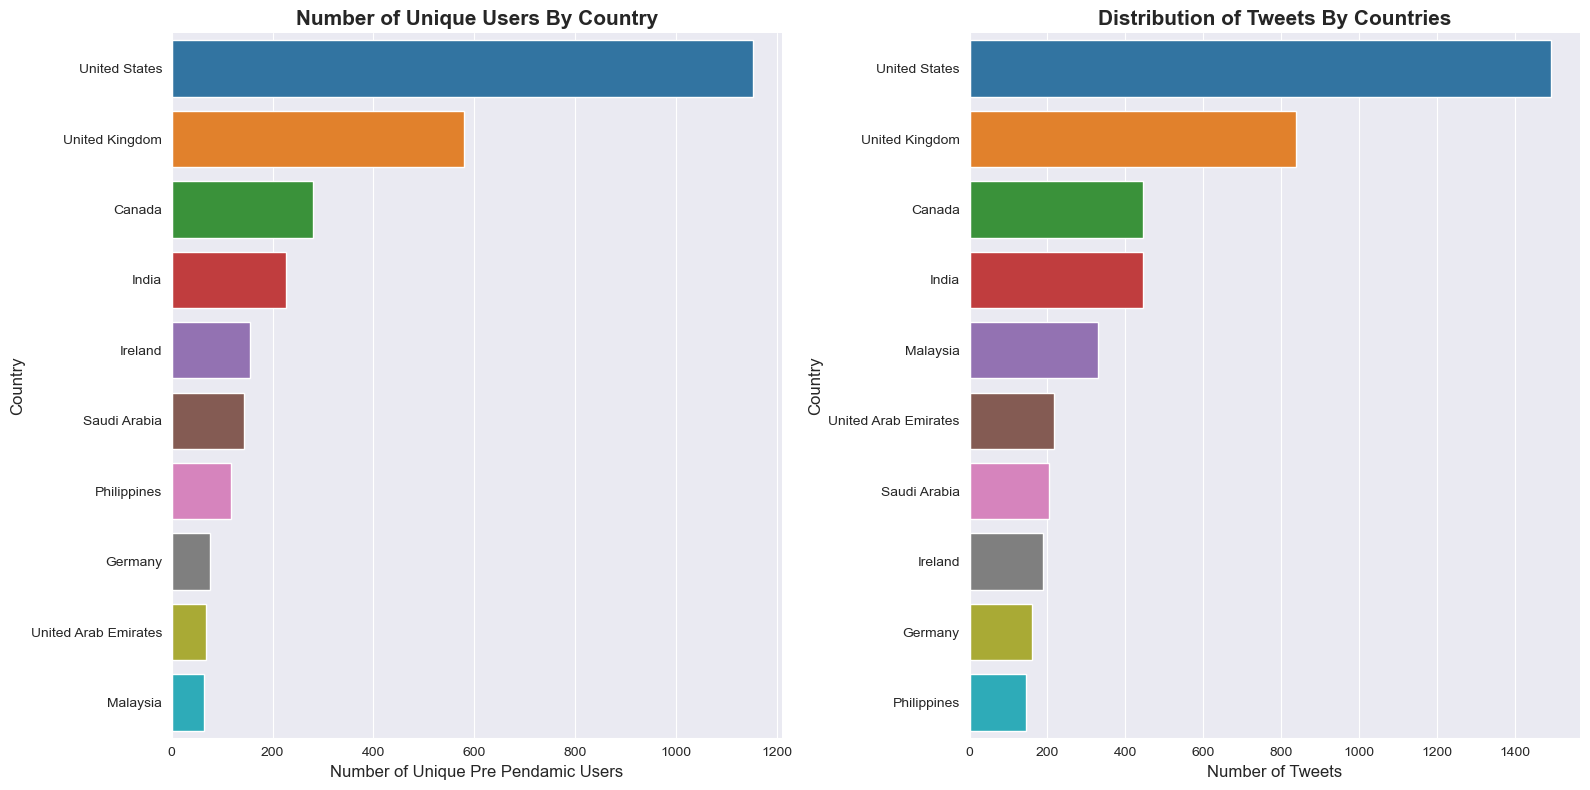

In [28]:
# pre_pandemic
# Convert the date to a pandas-compatible format


# Create a new figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first countplot in the first subplot
user_country = pre_covid_df[['user_name', 'country']].value_counts().reset_index()
top_10_countries =  user_country['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=user_country['country'], order=top_10_countries.index, orient='h', ax=axs[0])
axs[0].set_xlabel('Number of Unique Pre Pendamic Users', fontsize=12)
axs[0].set_ylabel('Country', fontsize=12)
axs[0].set_title("Number of Unique Users By Country", fontsize=15, fontweight='bold')

# Plot the second countplot in the second subplot
top_10_countries =  pre_covid_df['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=pre_covid_df['country'], order=top_10_countries.index, orient='h', ax=axs[1])
sns.despine() # Remove top and right spines
axs[1].set_xlabel('Number of Tweets', fontsize=12)
axs[1].set_ylabel('Country', fontsize=12)
axs[1].set_title('Distribution of Tweets By Countries', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 1600x2000 with 0 Axes>

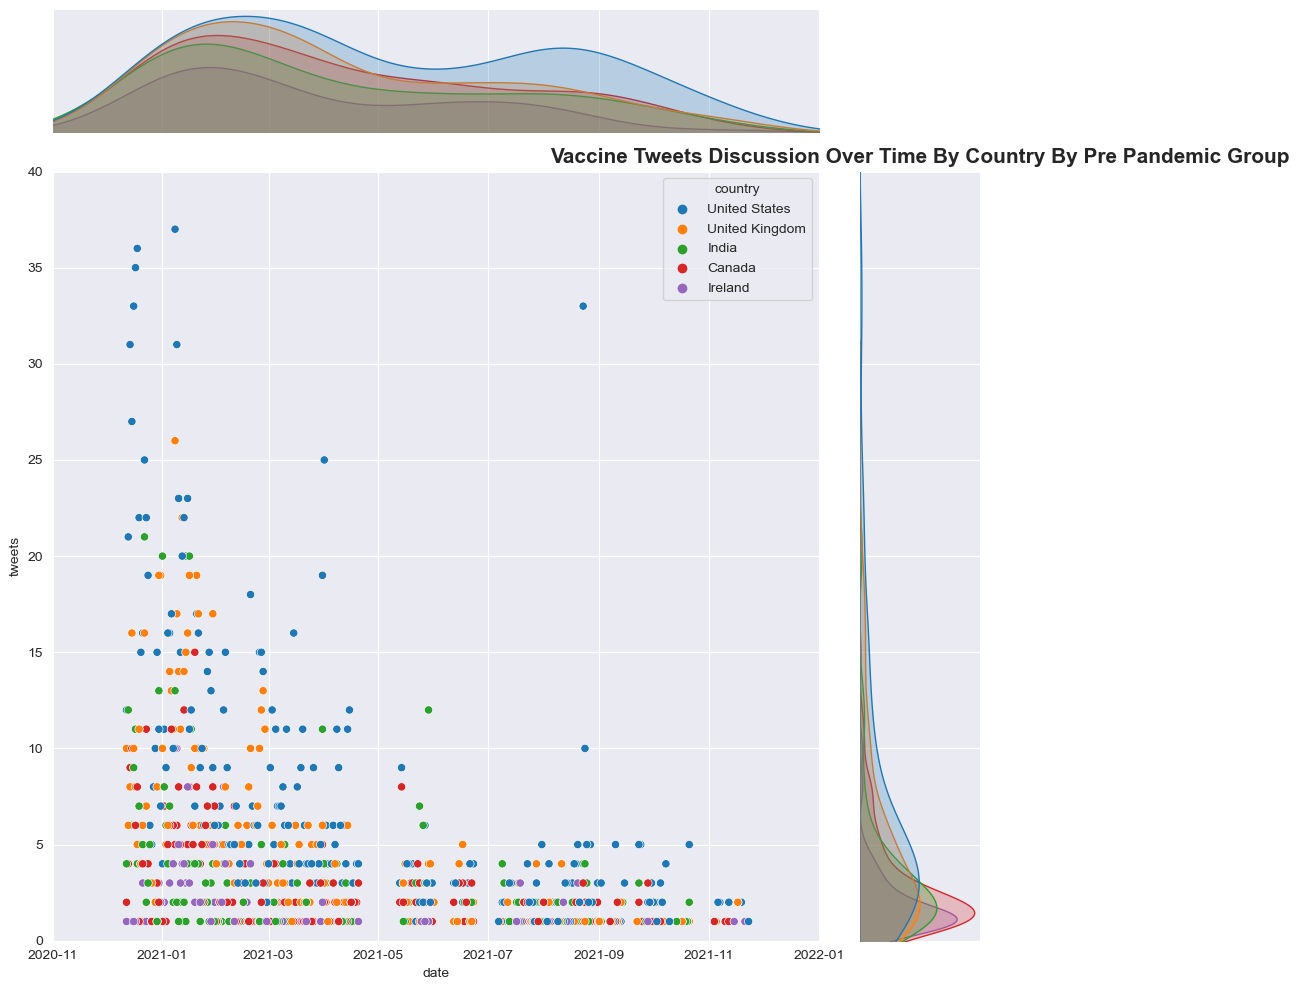

In [29]:
tweet_country = df[['date', 'country']].value_counts().reset_index(name='tweets')
top_5_countries =  user_country['country'].value_counts(sort=False).nlargest(5)
tweet_country = tweet_country[tweet_country['country'].isin(top_5_countries.index)]
# Make the joint plot
plt.figure(figsize=(16, 20))
sns.jointplot(x='date', y='tweets', data=tweet_country, 
              hue='country', height=10, 
              xlim = (datetime.date(2020, 11, 1), datetime.date(2022, 1, 1)), ylim=(0,40))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Vaccine Tweets Discussion Over Time By Country By Pre Pandemic Group', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 1600x2000 with 0 Axes>

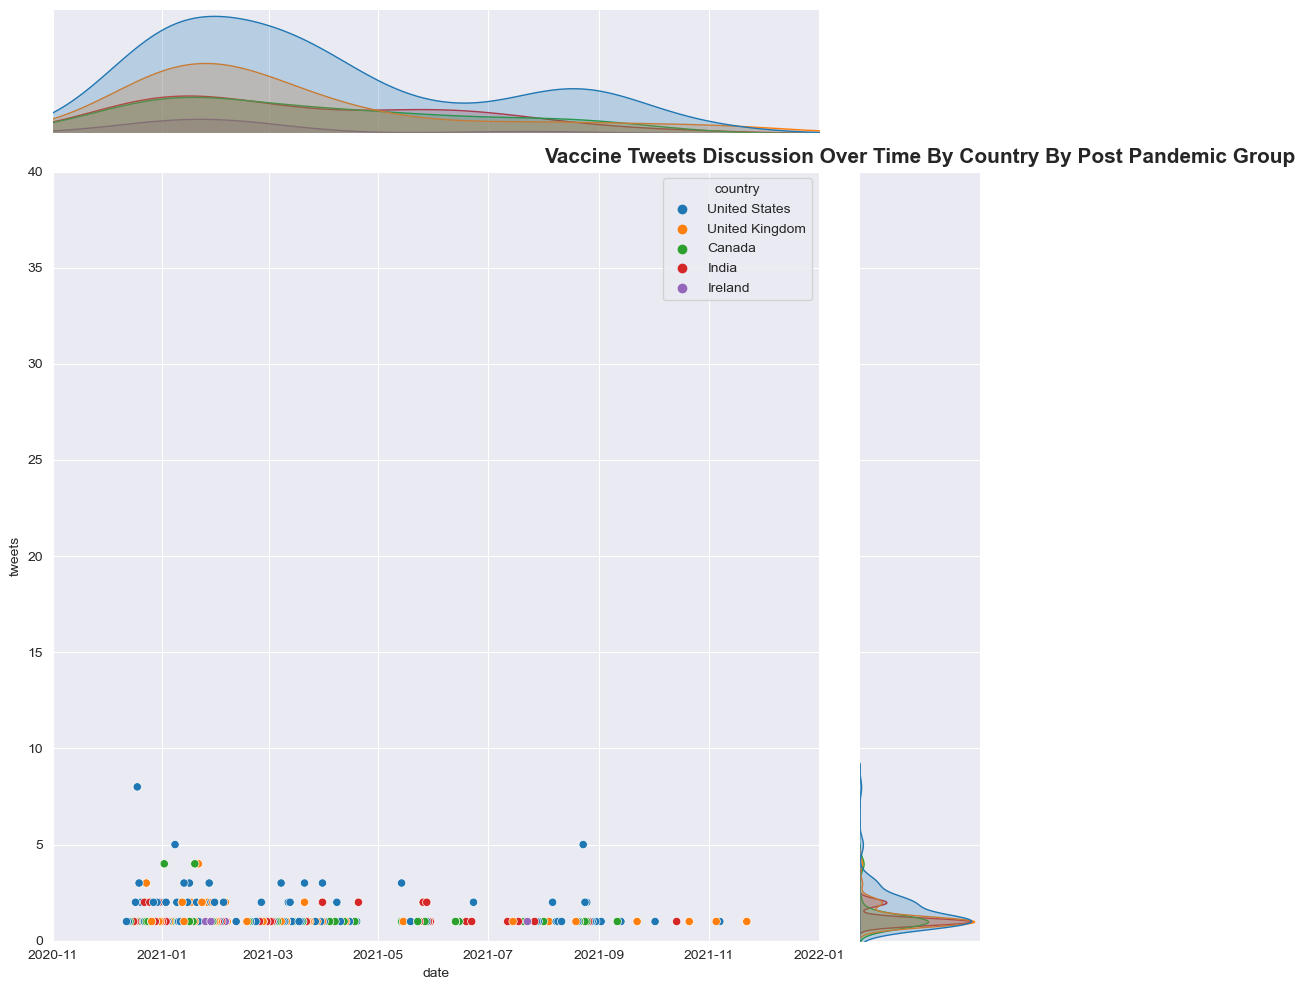

In [30]:
tweet_country = post_covid_df[['date', 'country']].value_counts().reset_index(name='tweets')
top_5_countries =  user_country['country'].value_counts(sort=False).nlargest(5)
tweet_country = tweet_country[tweet_country['country'].isin(top_5_countries.index)]
# Make the joint plot
plt.figure(figsize=(16, 20))
sns.jointplot(x='date', y='tweets', data=tweet_country, 
              hue='country', height=10, 
              xlim = (datetime.date(2020, 11, 1), datetime.date(2022, 1, 1)), ylim=(0,40))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Vaccine Tweets Discussion Over Time By Country By Post Pandemic Group', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 1600x2000 with 0 Axes>

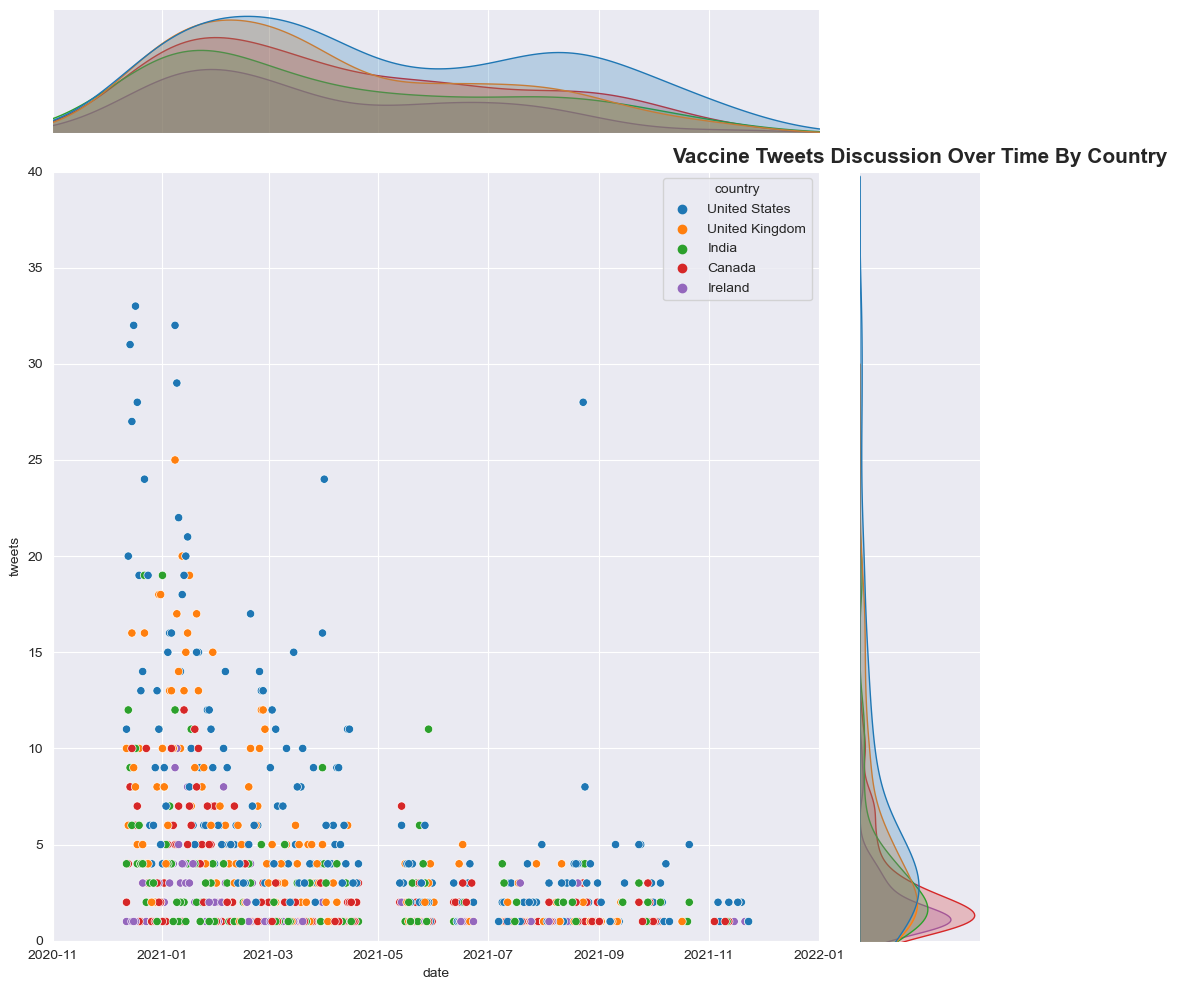

In [31]:
tweet_country = pre_covid_df[['date', 'country']].value_counts().reset_index(name='tweets')
top_5_countries =  user_country['country'].value_counts(sort=False).nlargest(5)
tweet_country = tweet_country[tweet_country['country'].isin(top_5_countries.index)]

# Make the joint plot
plt.figure(figsize=(16, 20))

sns.jointplot(x='date', y='tweets', data=tweet_country, 
              hue='country', height=10, 
              xlim = (datetime.date(2020, 11, 1), datetime.date(2022, 1, 1)), ylim=(0,40))

plt.xlabel('Date', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Vaccine Tweets Discussion Over Time By Country', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

Pfizer/BioNTech COVID-19 vaccine was distributed to 150 hospitals across the United States on December 14, 2020

COVID vaccine mandates in Los Angeles have been rolled out in different phases. On October 7, 2021, Los Angeles City Council passed one of the strictest coronavirus vaccine mandates in the United States, requiring proof of at least one dose of the COVID-19 vaccine beginning on October 7, and proof of full vaccination by November 4 for entry into indoor public spaces and businesses. Of the county's roughly 10 million residents, 78% had received at least one dose of the COVID-19 vaccine as of September 2021. Although enforcement of the mandate began on November 29, 2021, the mandate was later extended through January 15, 2022. 

In September 2021, New York City implemented a vaccine mandate for all public school employees. In September 2021, a vaccine mandate for hospital and nursing home workers was introduced. In February 2023, a judge blocked the state's COVID-19 vaccination mandate for healthcare facilities, although healthcare workers are still required to receive the COVID-19 vaccine. In November 2022, New York City's COVID-19 vaccine mandate covering private sector employees and customers ended. 

It is worth mentioning that the India only approved emergency use of the Pfizer vaccines, they were running other 9 vaccines. We will dig into what they were saying.

also why missing data and its impact on the curve

In [32]:
# checking sentiments

In [33]:
df = merged_df.copy()
pre_df=df[df['user_created']<pd.Timestamp(datetime.date(2020, 3, 1))]
post_df=df[df['user_created']>pd.Timestamp(datetime.date(2020, 3, 1))]

# extract year and month
df['year_month'] =  df['date'] + pd.offsets.Week(weekday=6)# df['date'].dt.strftime('%Y-%m')
pre_df['year_month'] = pre_df['date'] + pd.offsets.Week(weekday=6)# pre_df['date'].dt.strftime('%Y-%m')
post_df['year_month'] = post_df['date'] + pd.offsets.Week(weekday=6)# post_df['date'].dt.strftime('%Y-%m')

# group by year month
df = df.groupby(["year_month","country"]).mean().reset_index()
pre_df = pre_df.groupby(["year_month","country"]).mean().reset_index()
post_df = post_df.groupby(["year_month","country"]).mean().reset_index()

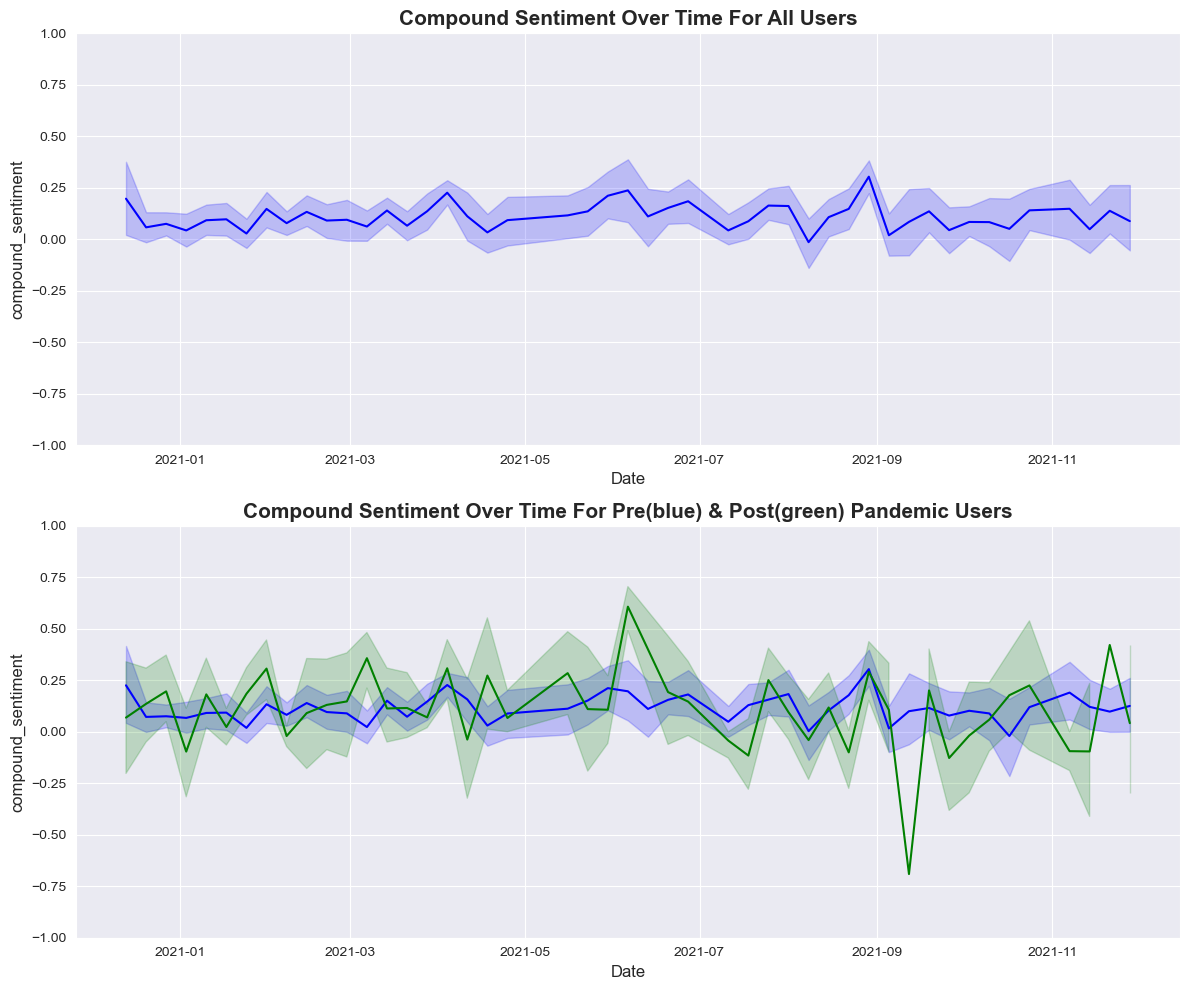

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.lineplot(x='year_month', y='compound_sentiment', data=df, color='blue', ax=axes[0])
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('compound_sentiment', fontsize=12)
axes[0].set_ylim([-1, 1])
axes[0].set_title('Compound Sentiment Over Time For All Users', fontsize=15, fontweight='bold')


sns.lineplot(x='year_month', y='compound_sentiment', data=pre_df, color='blue', ax=axes[1])
sns.lineplot(x='year_month', y='compound_sentiment', data=post_df, color='green', ax=axes[1])
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('compound_sentiment', fontsize=12)
axes[1].set_ylim([-1, 1])
axes[1].set_title('Compound Sentiment Over Time For Pre(blue) & Post(green) Pandemic Users', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()


In [35]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# sns.lineplot(x='year_month', y='pos_sentiment', data=df, color='blue', ax=axes[0])
# axes[0].set_xlabel('Date', fontsize=12)
# axes[0].set_ylabel('pos_sentiment', fontsize=12)
# axes[0].set_ylim([0, 1])
# axes[0].set_title('Positive Sentiment Over Time For All Users', fontsize=15, fontweight='bold')

# sns.lineplot(x='year_month', y='pos_sentiment', data=pre_df, color='blue', ax=axes[1])
# sns.lineplot(x='year_month', y='pos_sentiment', data=post_df, color='green', ax=axes[1])
# axes[1].set_xlabel('Date', fontsize=12)
# axes[1].set_ylabel('pos_sentiment', fontsize=12)
# axes[1].set_ylim([0, 1])
# axes[1].set_title('Positive Sentiment Over Time For Pre(blue) & Post(green) Pandemic Users', fontsize=15, fontweight='bold')

# plt.tight_layout()
# plt.show()

In [36]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# sns.lineplot(x='year_month', y='neg_sentiment', data=df, color='blue', ax=axes[0])
# axes[0].set_xlabel('Date', fontsize=12)
# axes[0].set_ylabel('neg_sentiment', fontsize=12)
# axes[0].set_ylim([0, 1])
# axes[0].set_title('Negative Sentiment Over Time For All Users', fontsize=15, fontweight='bold')

# sns.lineplot(x='year_month', y='neg_sentiment', data=pre_df, color='blue', ax=axes[1])
# sns.lineplot(x='year_month', y='neg_sentiment', data=post_df, color='green', ax=axes[1])
# axes[1].set_xlabel('Date', fontsize=12)
# axes[1].set_ylabel('neg_sentiment', fontsize=12)
# axes[1].set_ylim([0, 1])
# axes[1].set_title('Negative Sentiment Over Time For Pre(blue) & Post(green) Pandemic Users', fontsize=15, fontweight='bold')

# plt.tight_layout()
# plt.show()

In [37]:
# for compound snetiment score, the trend started to gain more volatility after 2021-07
# we can also observe this in the negaive sentiment score chart, the peak in 2021-10 is due to less amount of data and thus we consider it outliers
# the positive sentiment score seems more violent after 2021-9, probablit due to less data collected

In [38]:
df = merged_df.copy()
df['user_type'] = df['user_created'].apply(lambda x: "Pre Pandemic" if x<pd.Timestamp(datetime.date(2020, 3, 1)) else "Post Pandemic")

# extract year and month
df['year_month'] =  df['date'] + pd.offsets.Week(weekday=6)

# get the countruies with most tweets
top_4_countries =  df['country'].value_counts(sort=False).nlargest(4)

# sub set the data
top_4_df = df[df['country'].isin(top_4_countries.index)]

# group by year month
top_4_df = top_4_df.groupby(["year_month","country","user_type"]).mean().reset_index()

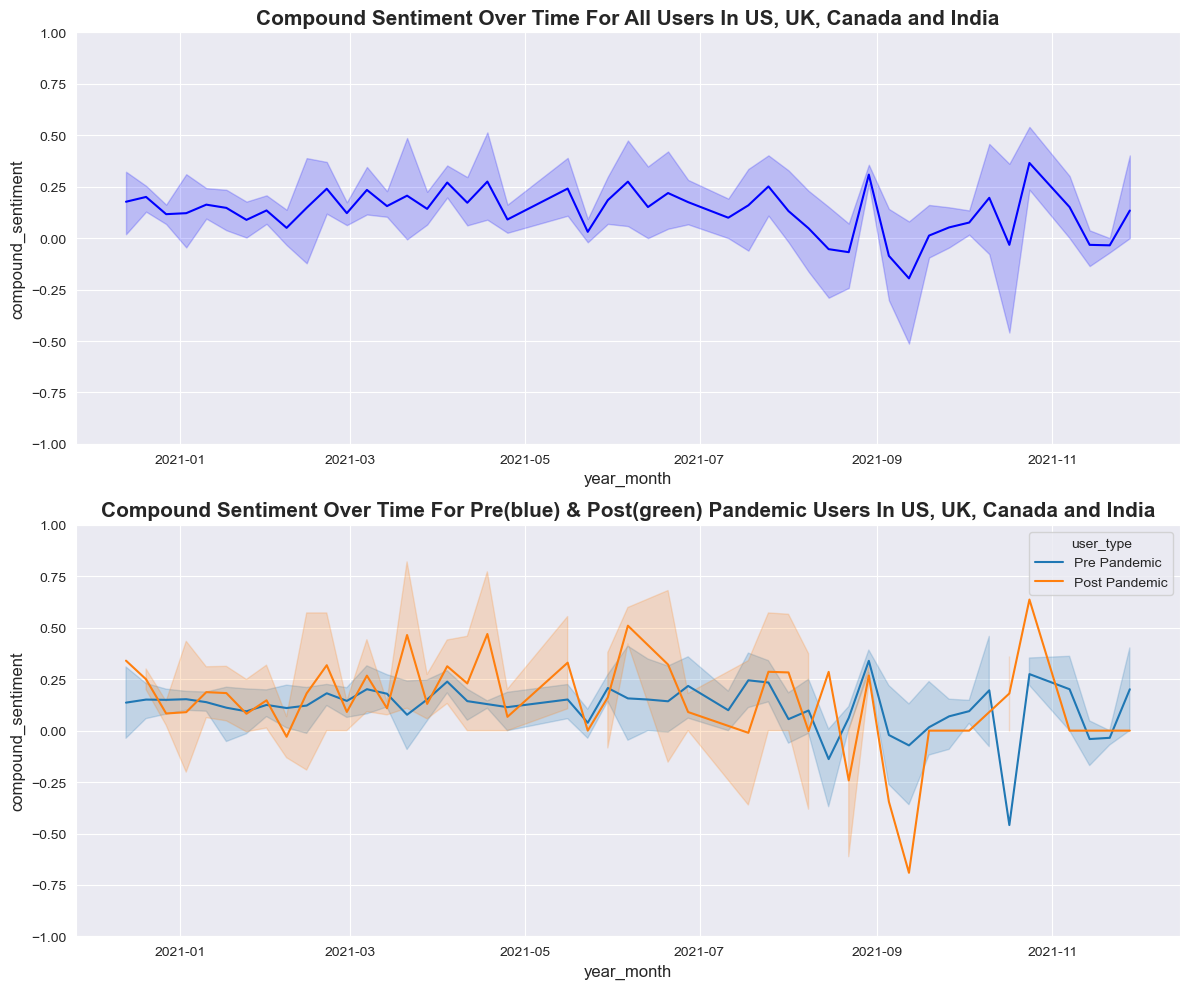

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_df, color='blue', ax=axes[0])
axes[0].set_xlabel('year_month', fontsize=12)
axes[0].set_ylabel('compound_sentiment', fontsize=12)
axes[0].set_ylim([-1, 1])
axes[0].set_title('Compound Sentiment Over Time For All Users In US, UK, Canada and India', fontsize=15, fontweight='bold')

# sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_pre_df, color='blue', ax=axes[1])
# sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_post_df, color='green', ax=axes[1])
sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_df, hue='user_type', ax=axes[1])
axes[1].set_xlabel('year_month', fontsize=12)
axes[1].set_ylabel('compound_sentiment', fontsize=12)
axes[1].set_ylim([-1, 1])
axes[1].set_title('Compound Sentiment Over Time For Pre(blue) & Post(green) Pandemic Users In US, UK, Canada and India', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

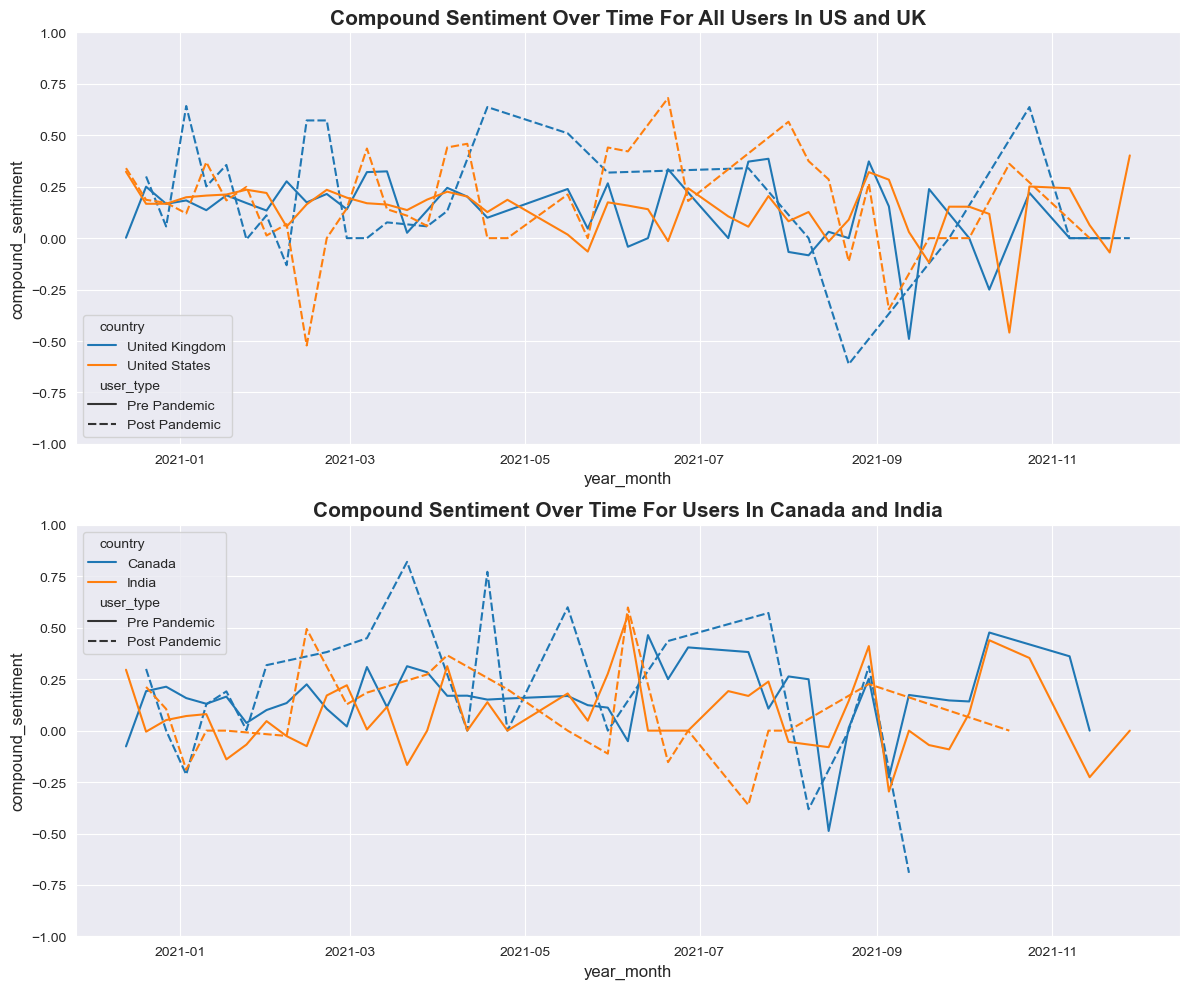

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_df[top_4_df.country.isin(["United Kingdom","United States"])], hue='country', style ="user_type", ax=axes[0])
axes[0].set_xlabel('year_month', fontsize=12)
axes[0].set_ylabel('compound_sentiment', fontsize=12)
axes[0].set_ylim([-1, 1])
axes[0].set_title('Compound Sentiment Over Time For All Users In US and UK', fontsize=15, fontweight='bold')

sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_df[top_4_df.country.isin(["Canada","India"])], hue='country', style ="user_type", ax=axes[1])
axes[1].set_xlabel('year_month', fontsize=12)
axes[1].set_ylabel('compound_sentiment', fontsize=12)
axes[1].set_ylim([-1, 1])
axes[1].set_title('Compound Sentiment Over Time For Users In Canada and India', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

In [41]:
# is there a difference between US and other countries?


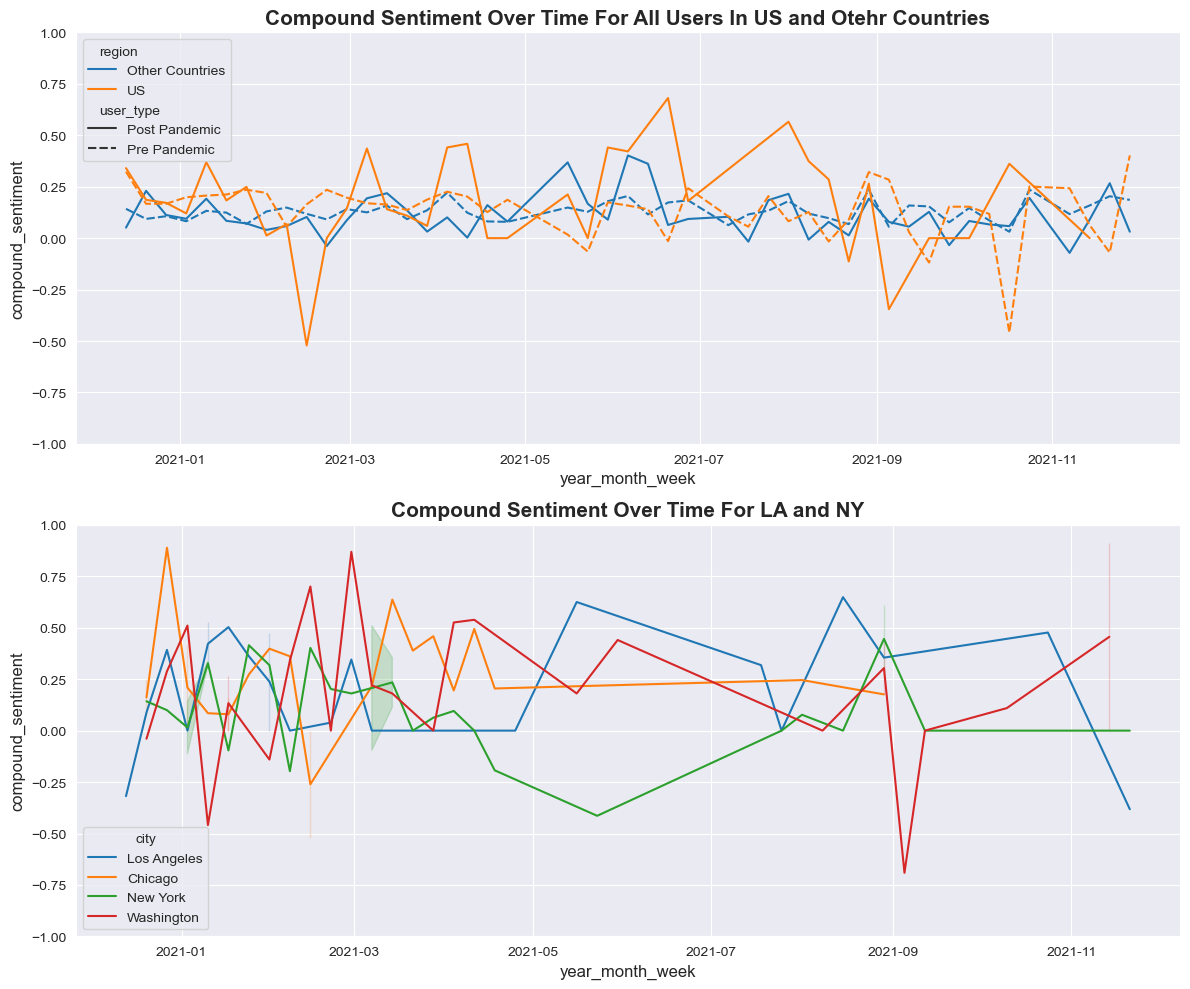

In [62]:


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

df = merged_df.copy()
df['user_type'] = df['user_created'].apply(lambda x: "Pre Pandemic" if x<pd.Timestamp(datetime.date(2020, 3, 1)) else "Post Pandemic")
df['region'] = df['country'].apply(lambda x: "US" if x=="United States" else "Other Countries")
# extract year and month
df['year_month_week'] =  df['date'] + pd.offsets.Week(weekday=6)
# group by year month
df = df.groupby(["year_month_week","region","user_type"]).mean().reset_index()

sns.lineplot(x='year_month_week', y='compound_sentiment', data=df, hue='region', style ="user_type", ax=axes[0])
axes[0].set_xlabel('year_month_week', fontsize=12)
axes[0].set_ylabel('compound_sentiment', fontsize=12)
axes[0].set_ylim([-1, 1])
axes[0].set_title('Compound Sentiment Over Time For All Users In US and Otehr Countries', fontsize=15, fontweight='bold')


df = merged_df.copy()
df['user_type'] = df['user_created'].apply(lambda x: "Pre Pandemic" if x<pd.Timestamp(datetime.date(2020, 3, 1)) else "Post Pandemic")
df['region'] = df['country'].apply(lambda x: "US" if x=="United States" else "Other Countries")
# extract year and month
df['year_month_week'] =  df['date'] + pd.offsets.Week(weekday=6)
# group by year month
df = df.groupby(["year_month_week","city","user_type"]).mean().reset_index()

sns.lineplot(x='year_month_week', y='compound_sentiment', data=df[df.city.isin(['New York', 'Los Angeles',"Chicago","Washington"])], hue='city', ax=axes[1])
axes[1].set_xlabel('year_month_week', fontsize=12)
axes[1].set_ylabel('compound_sentiment', fontsize=12)
axes[1].set_ylim([-1, 1])
axes[1].set_title('Compound Sentiment Over Time For LA and NY', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

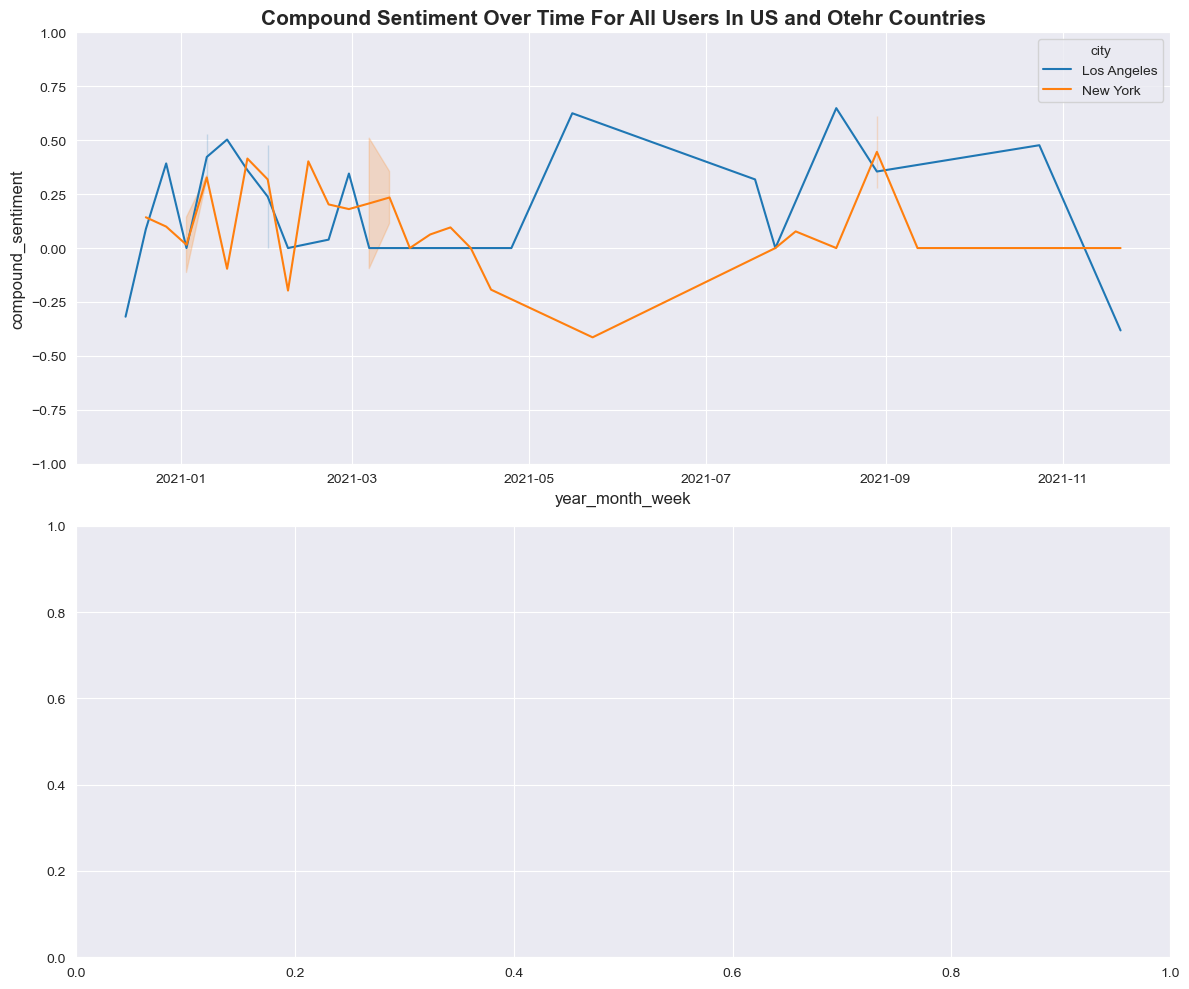

In [56]:
df = merged_df.copy()
df['user_type'] = df['user_created'].apply(lambda x: "Pre Pandemic" if x<pd.Timestamp(datetime.date(2020, 3, 1)) else "Post Pandemic")
df['region'] = df['country'].apply(lambda x: "US" if x=="United States" else "Other Countries")

# extract year and month
df['year_month_week'] =  df['date'] + pd.offsets.Week(weekday=6)

# group by year month
df = df.groupby(["year_month_week","city","user_type"]).mean().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.lineplot(x='year_month_week', y='compound_sentiment', data=df[df.city.isin(['New York', 'Los Angeles'])], hue='city', ax=axes[0])
axes[0].set_xlabel('year_month_week', fontsize=12)
axes[0].set_ylabel('compound_sentiment', fontsize=12)
axes[0].set_ylim([-1, 1])
axes[0].set_title('Compound Sentiment Over Time For All Users In US and Otehr Countries', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Correlation Analysis

### Introduction

### Introduction

### Introduction

### Introduction

### Introduction

### Introduction

### Introduction